# Regresión lógística binomial

[Curso de Regresión Logística con Python y scikit-learn](https://platiz.com/reglog)

## Carga de datos

In [170]:
import pandas as pd
import numpy as np

In [171]:
df = pd.read_csv('/Users/andressanchez/Desktop/Data Scientist/Logistic Regression Course with Python and scikit-learn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Cambiar total_charges a numeric

In [173]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

## Manejo de datos nulos

In [174]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [175]:
df.dropna(inplace=True)

## Eliminar id

In [176]:
df.head( )

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [177]:
df.drop('customerID', axis=1, inplace=True)

## Convertir a numérico variable objetivo

In [178]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [179]:
df_processing = df.copy()

In [180]:
df_processing.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Manejo de variables categóricas

In [181]:
#df_processing = pd.get_dummies(df_processing, drop_first=True)
df_processing = pd.get_dummies(df_processing)
df_processing.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


## Analisis de correlación

In [182]:
import matplotlib.pyplot as plt

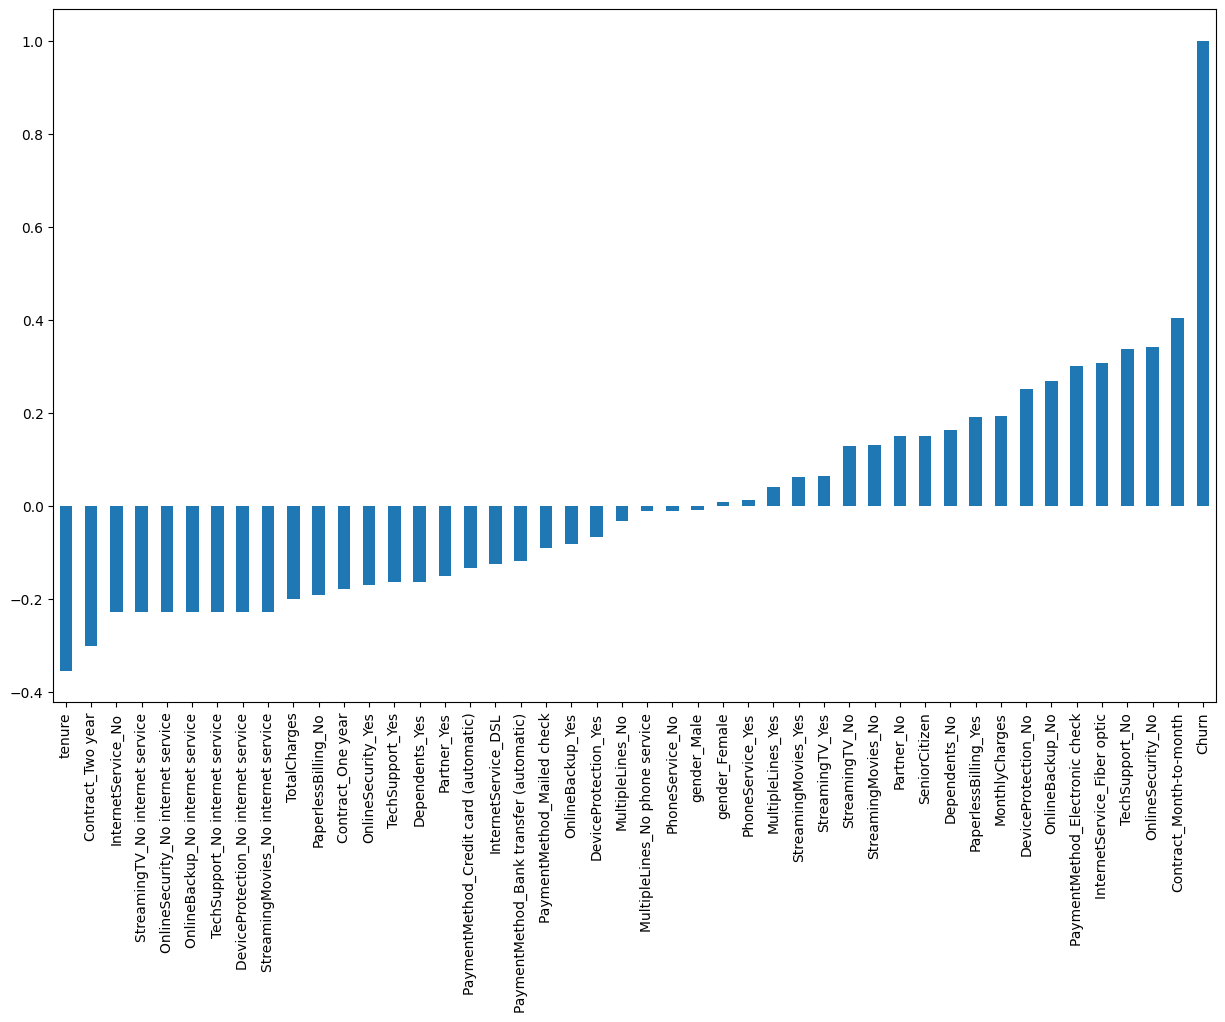

In [183]:
fig = plt.figure(figsize=(15,9))
df_processing.corr()['Churn'].sort_values(ascending=True).plot(kind='bar');

In [184]:
import seaborn as sns

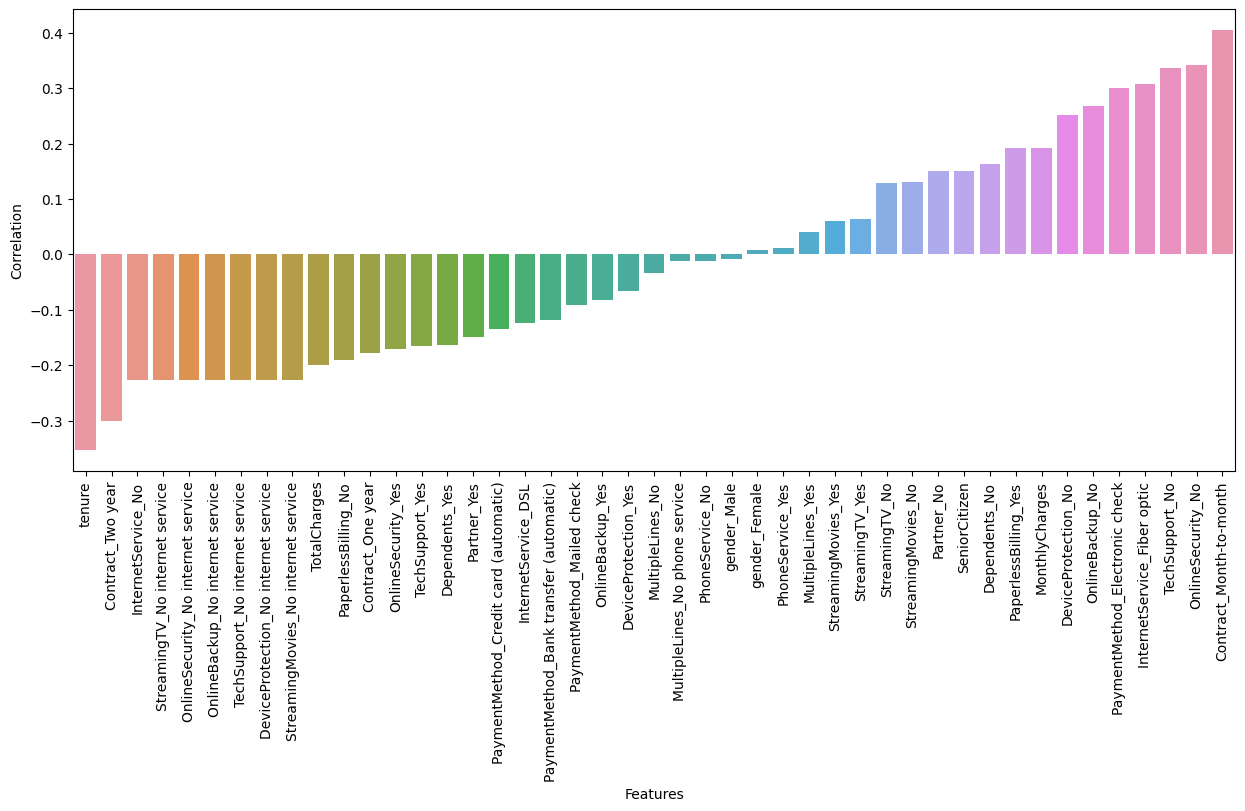

In [185]:
plt.figure(figsize=(15,6));
data_corr = pd.DataFrame(df_processing.corr()['Churn'].sort_values()[:-1]).reset_index()
sns.barplot(data=data_corr, x='index', y='Churn');
plt.ylabel('Correlation');
plt.xlabel('Features');
plt.xticks(rotation=90);

## Escalabilidad de los datos

In [186]:
from sklearn.preprocessing import MinMaxScaler

In [187]:
scaler = MinMaxScaler()
df_processing_scaled = pd.DataFrame(scaler.fit_transform(df_processing), columns=df_processing.columns)
df_processing_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Análisis exploratorio de datos

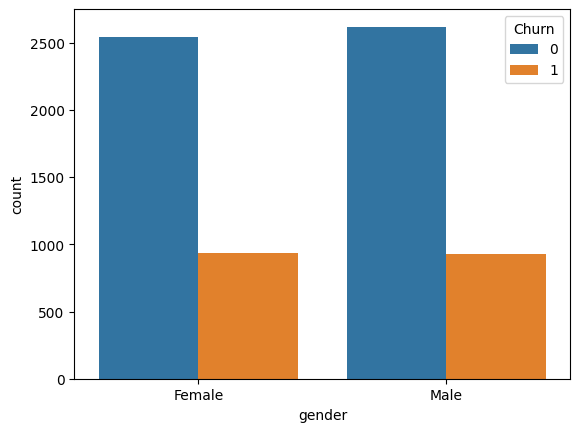

In [188]:
sns.countplot(data=df, x='gender', hue='Churn');

In [189]:
def plot_categorical(colum):
    fig = plt.figure(figsize=(10,10))
    sns.countplot(data=df, x=colum, hue='Churn');
    

In [190]:
colum_cat = df.select_dtypes(include='object').columns

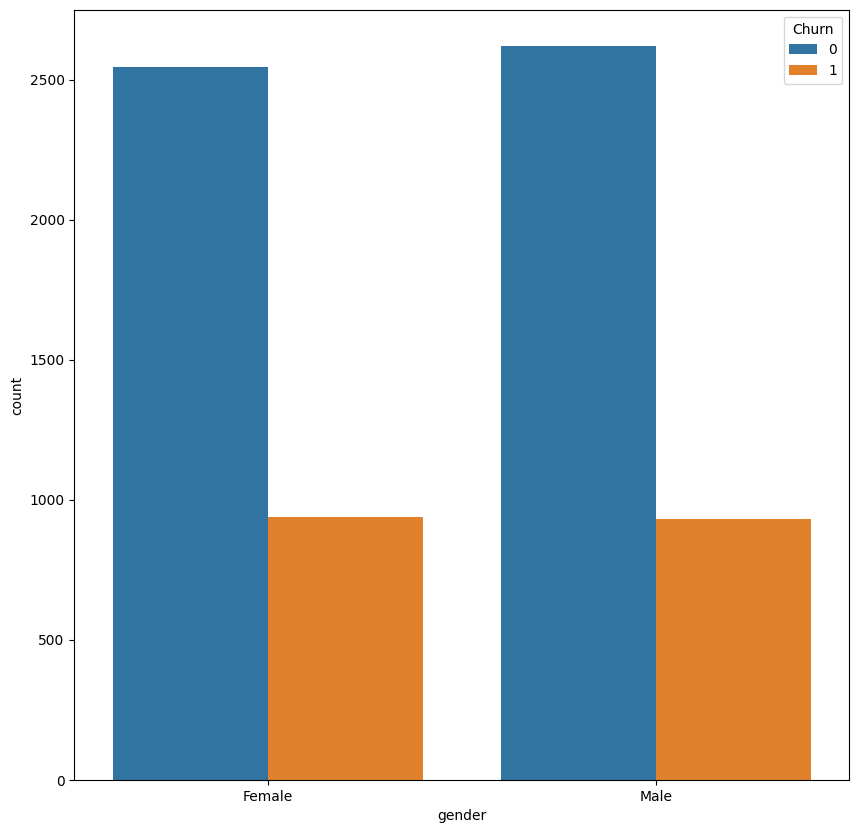

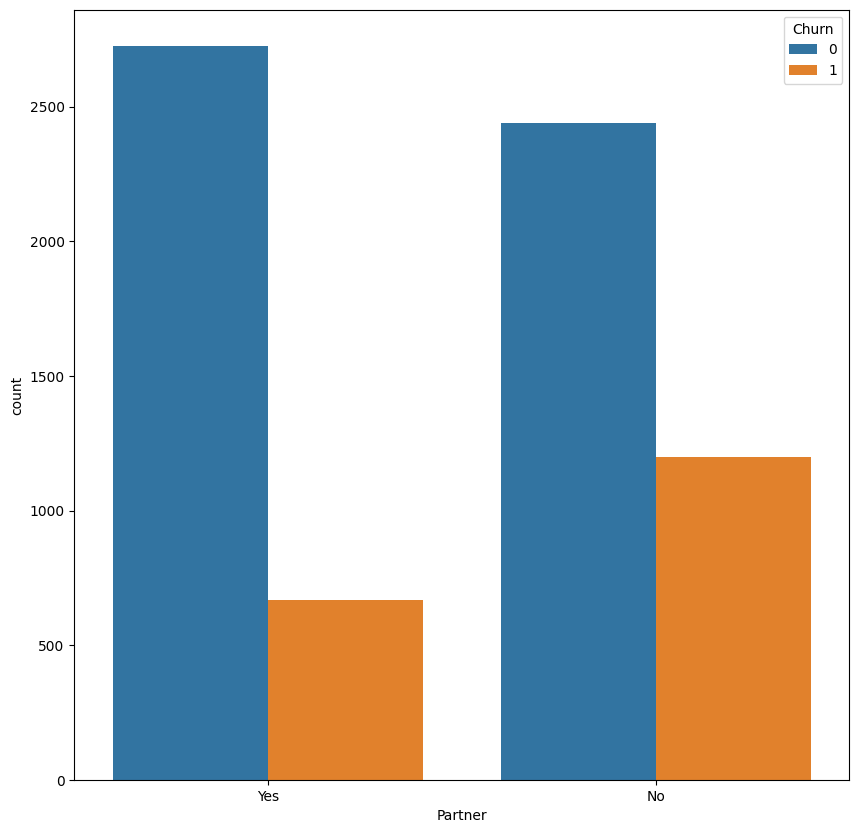

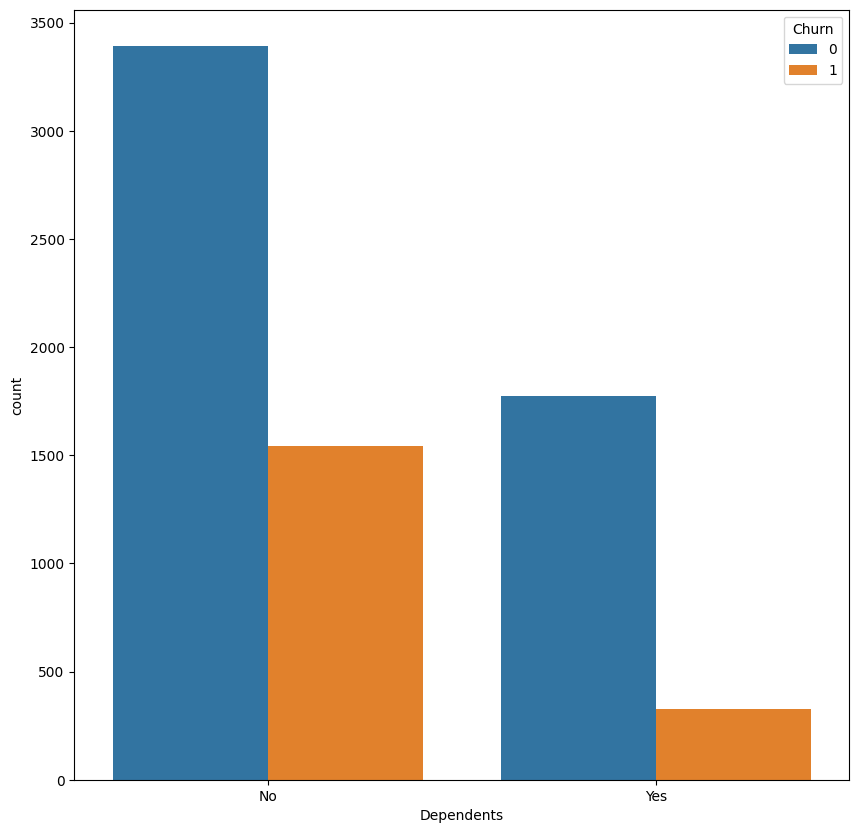

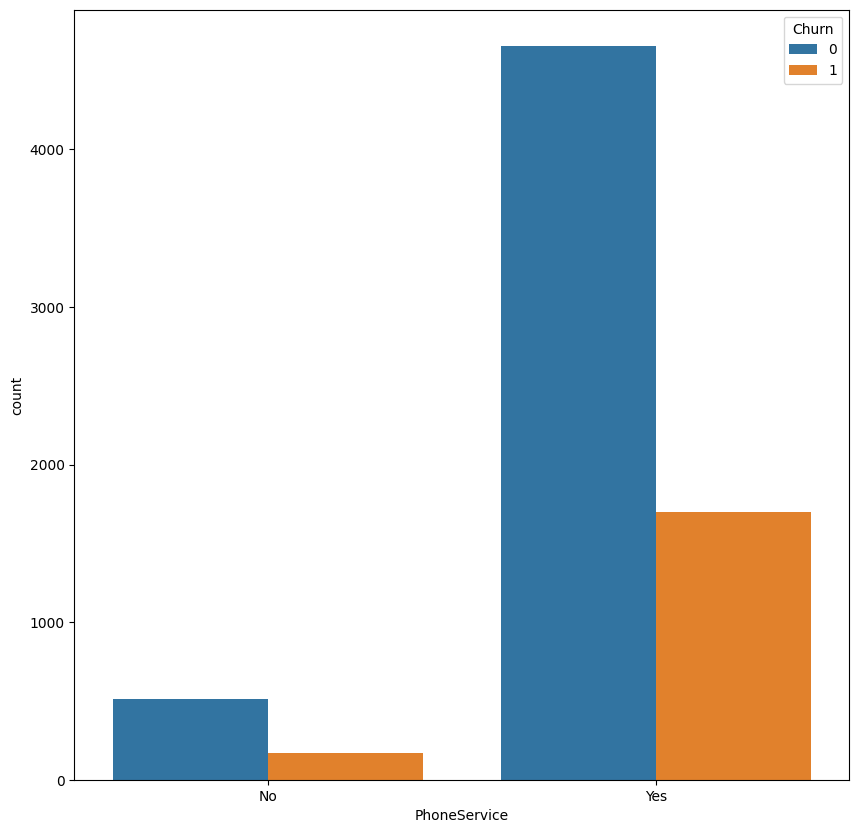

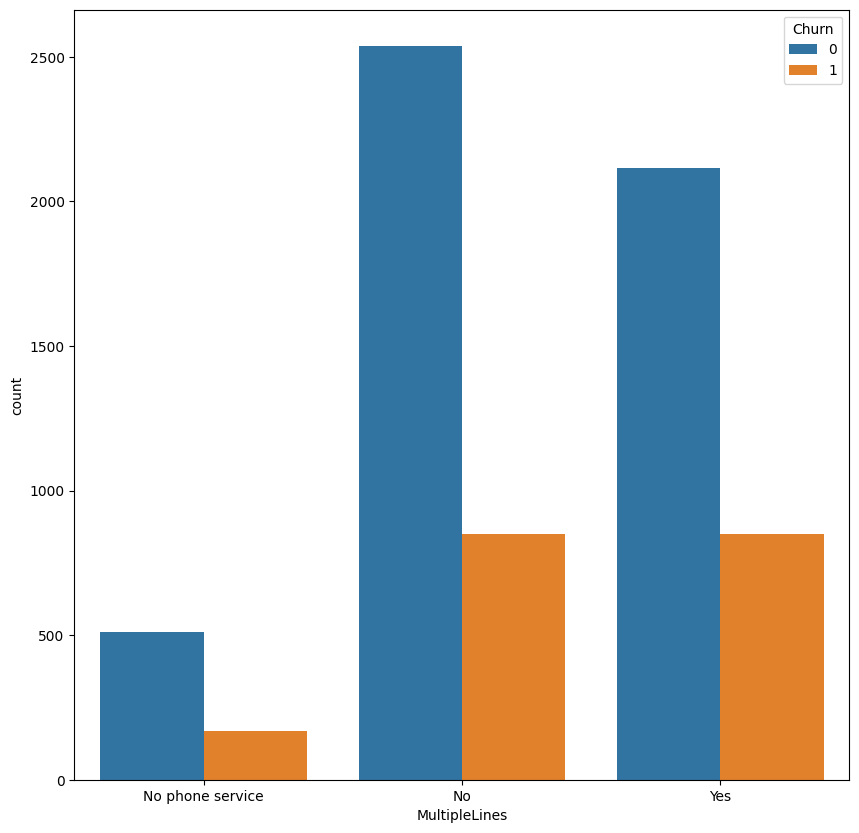

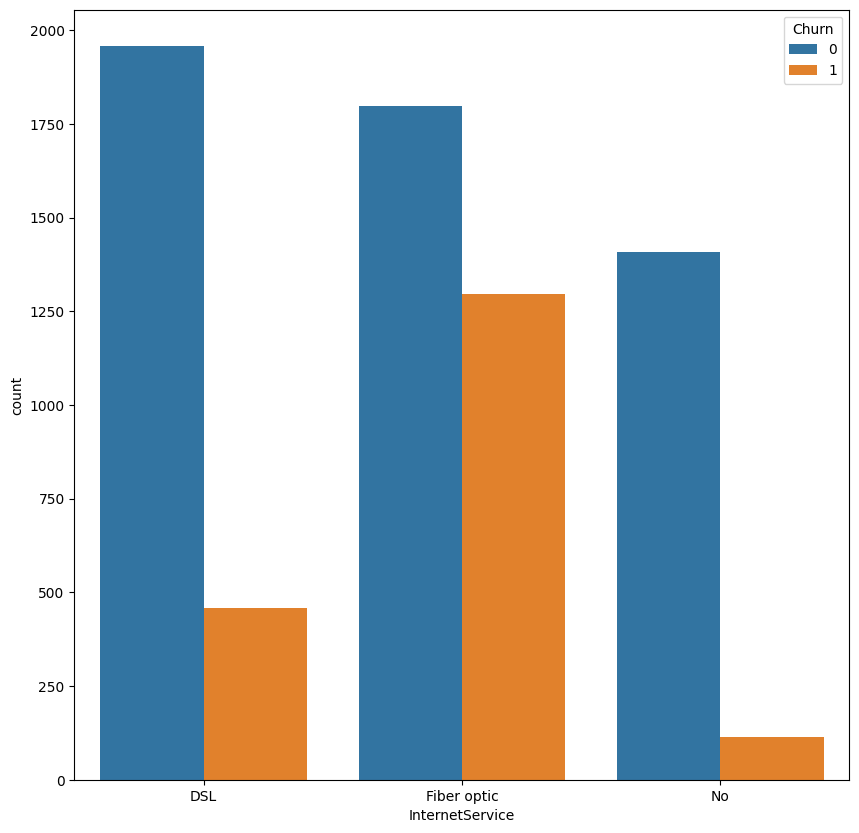

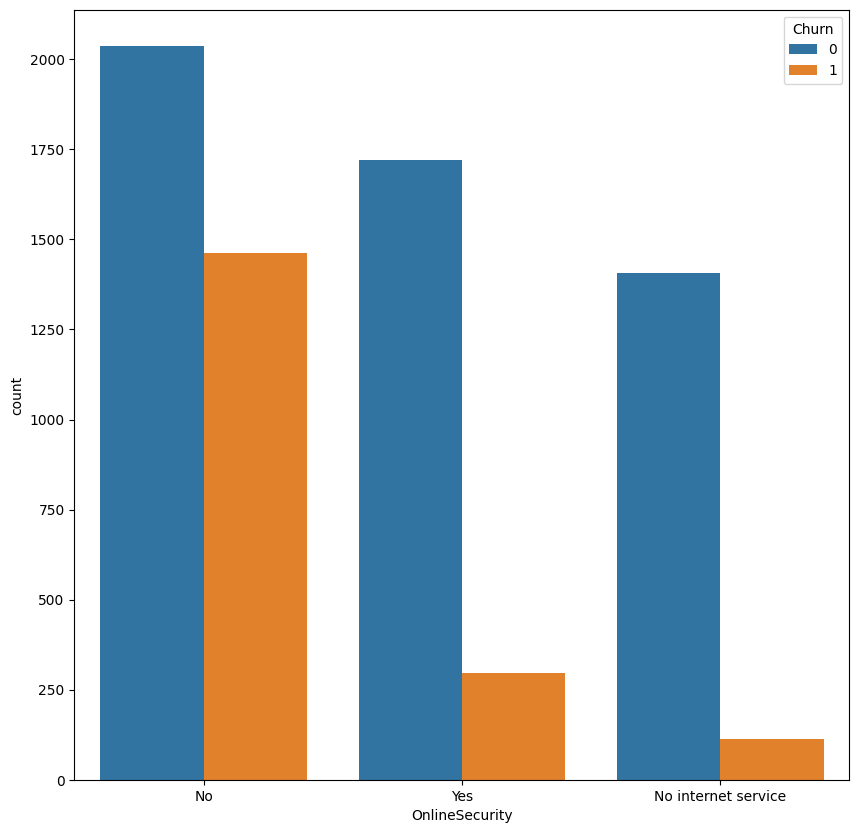

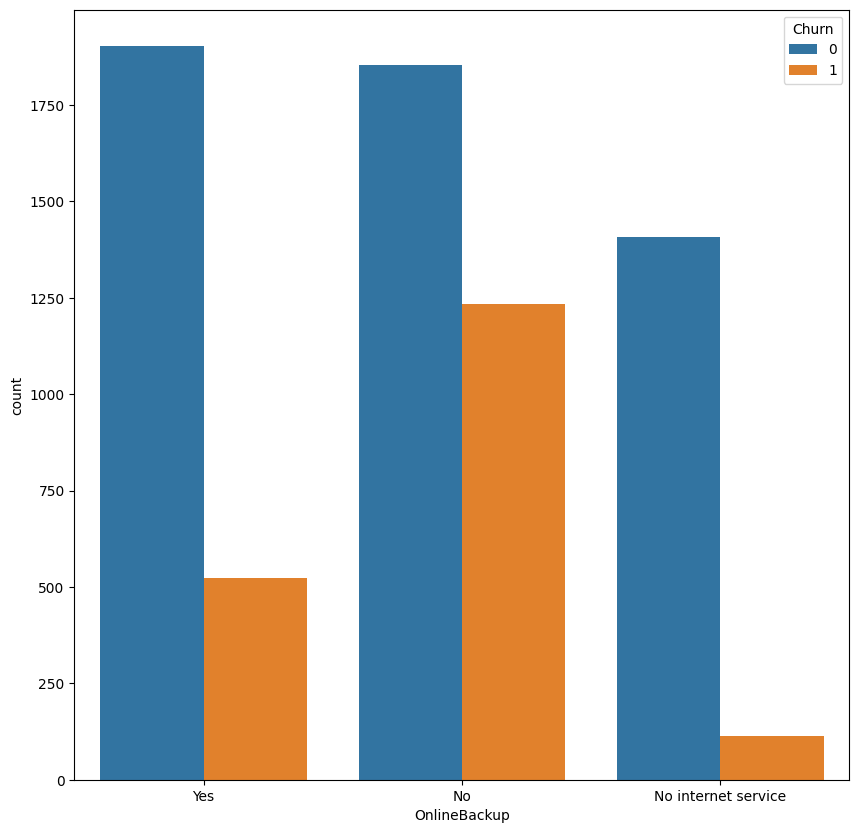

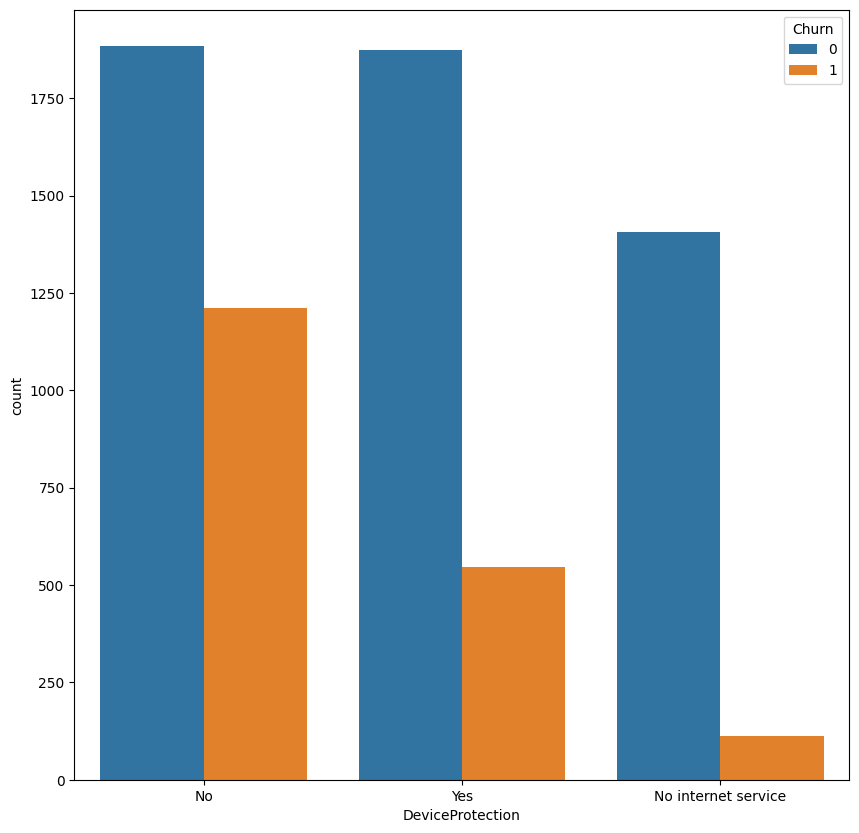

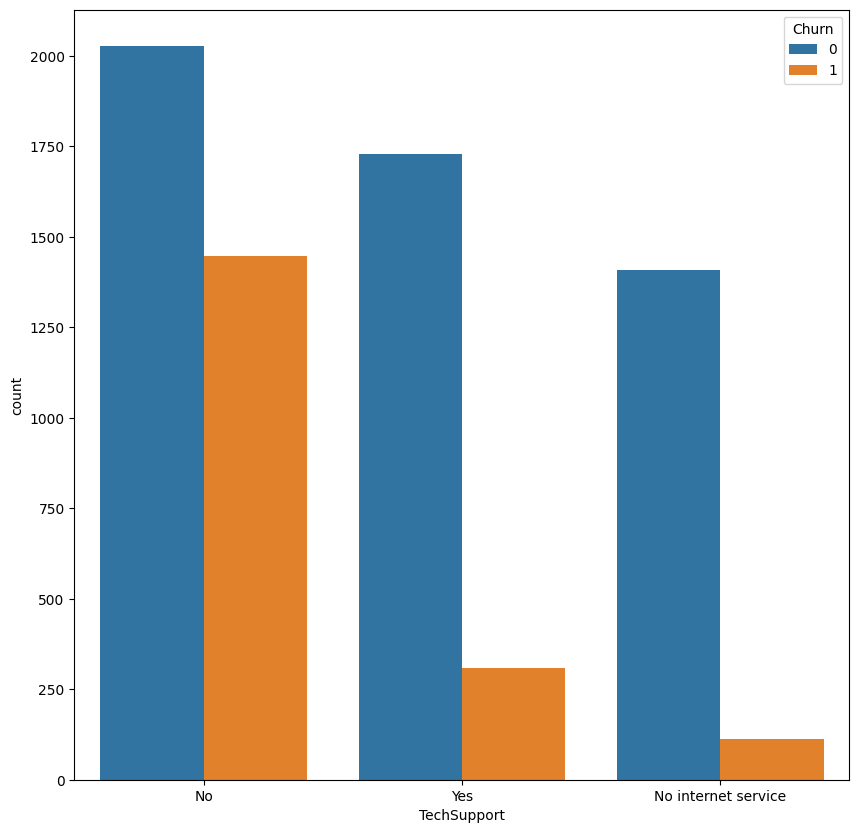

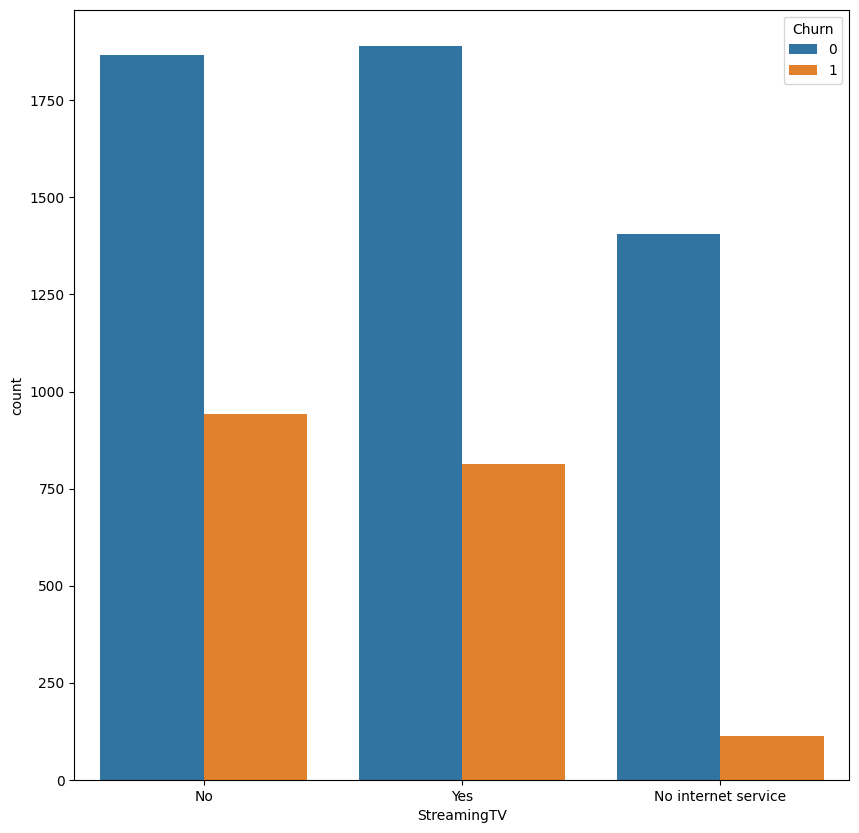

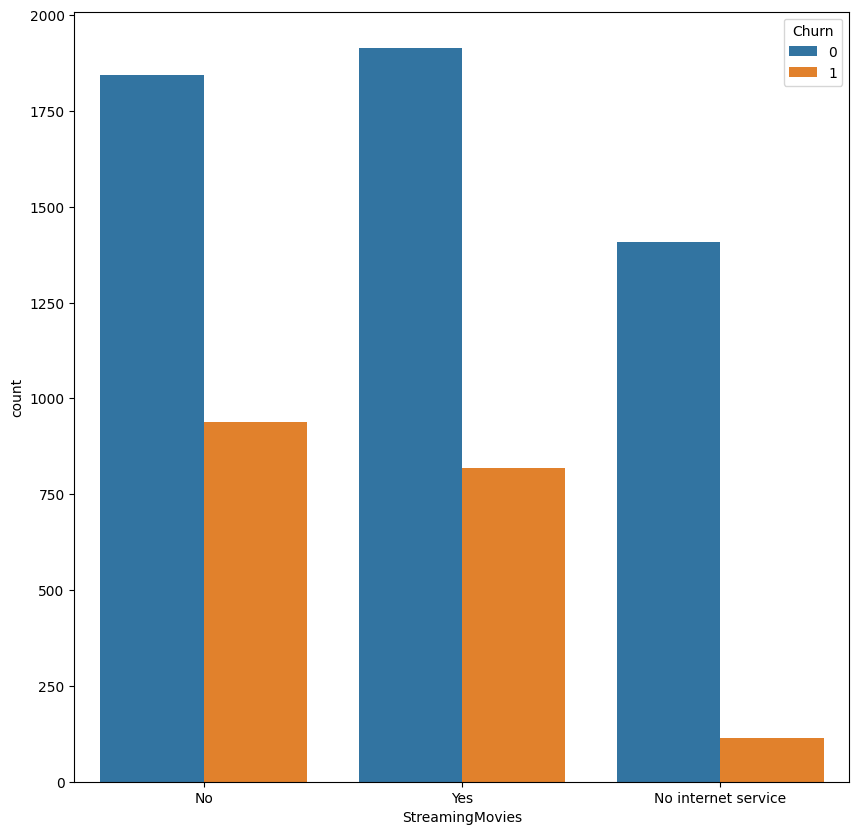

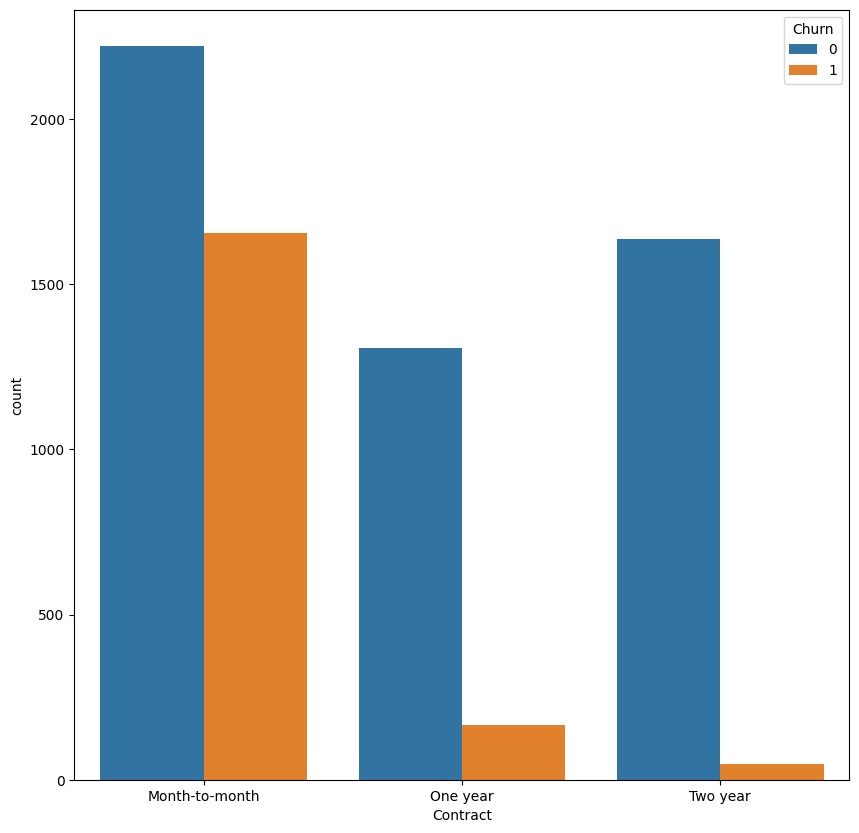

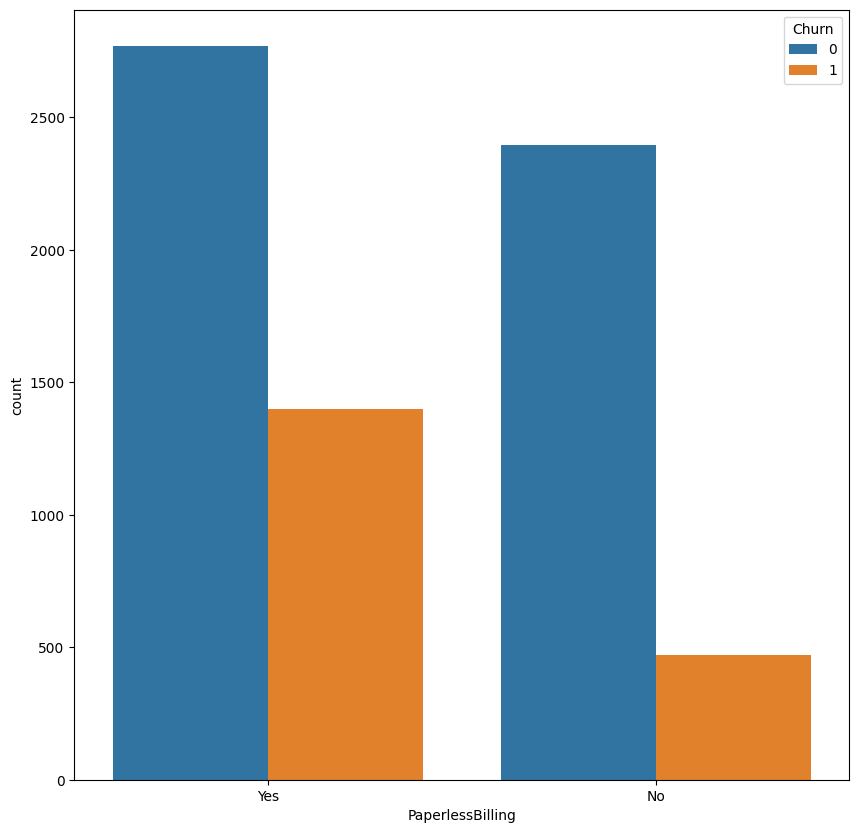

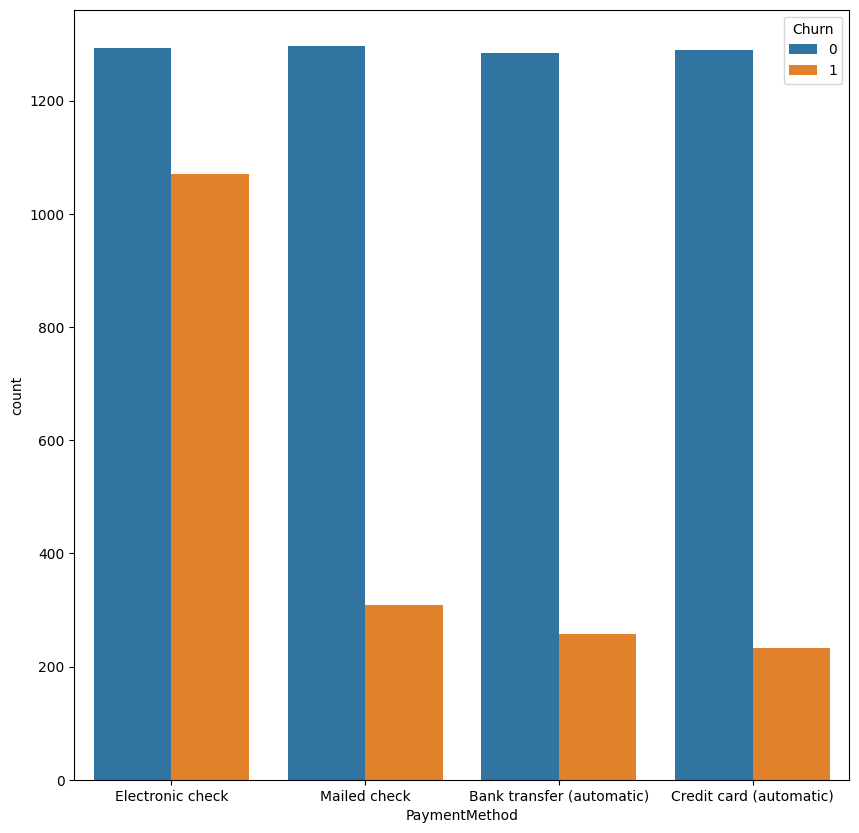

In [191]:
for _ in colum_cat:
    plot_categorical(_)

/var/folders/3j/6x57938974z0qwy867642sz00000gn/T/ipykernel_4140/2385336851.py:15: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


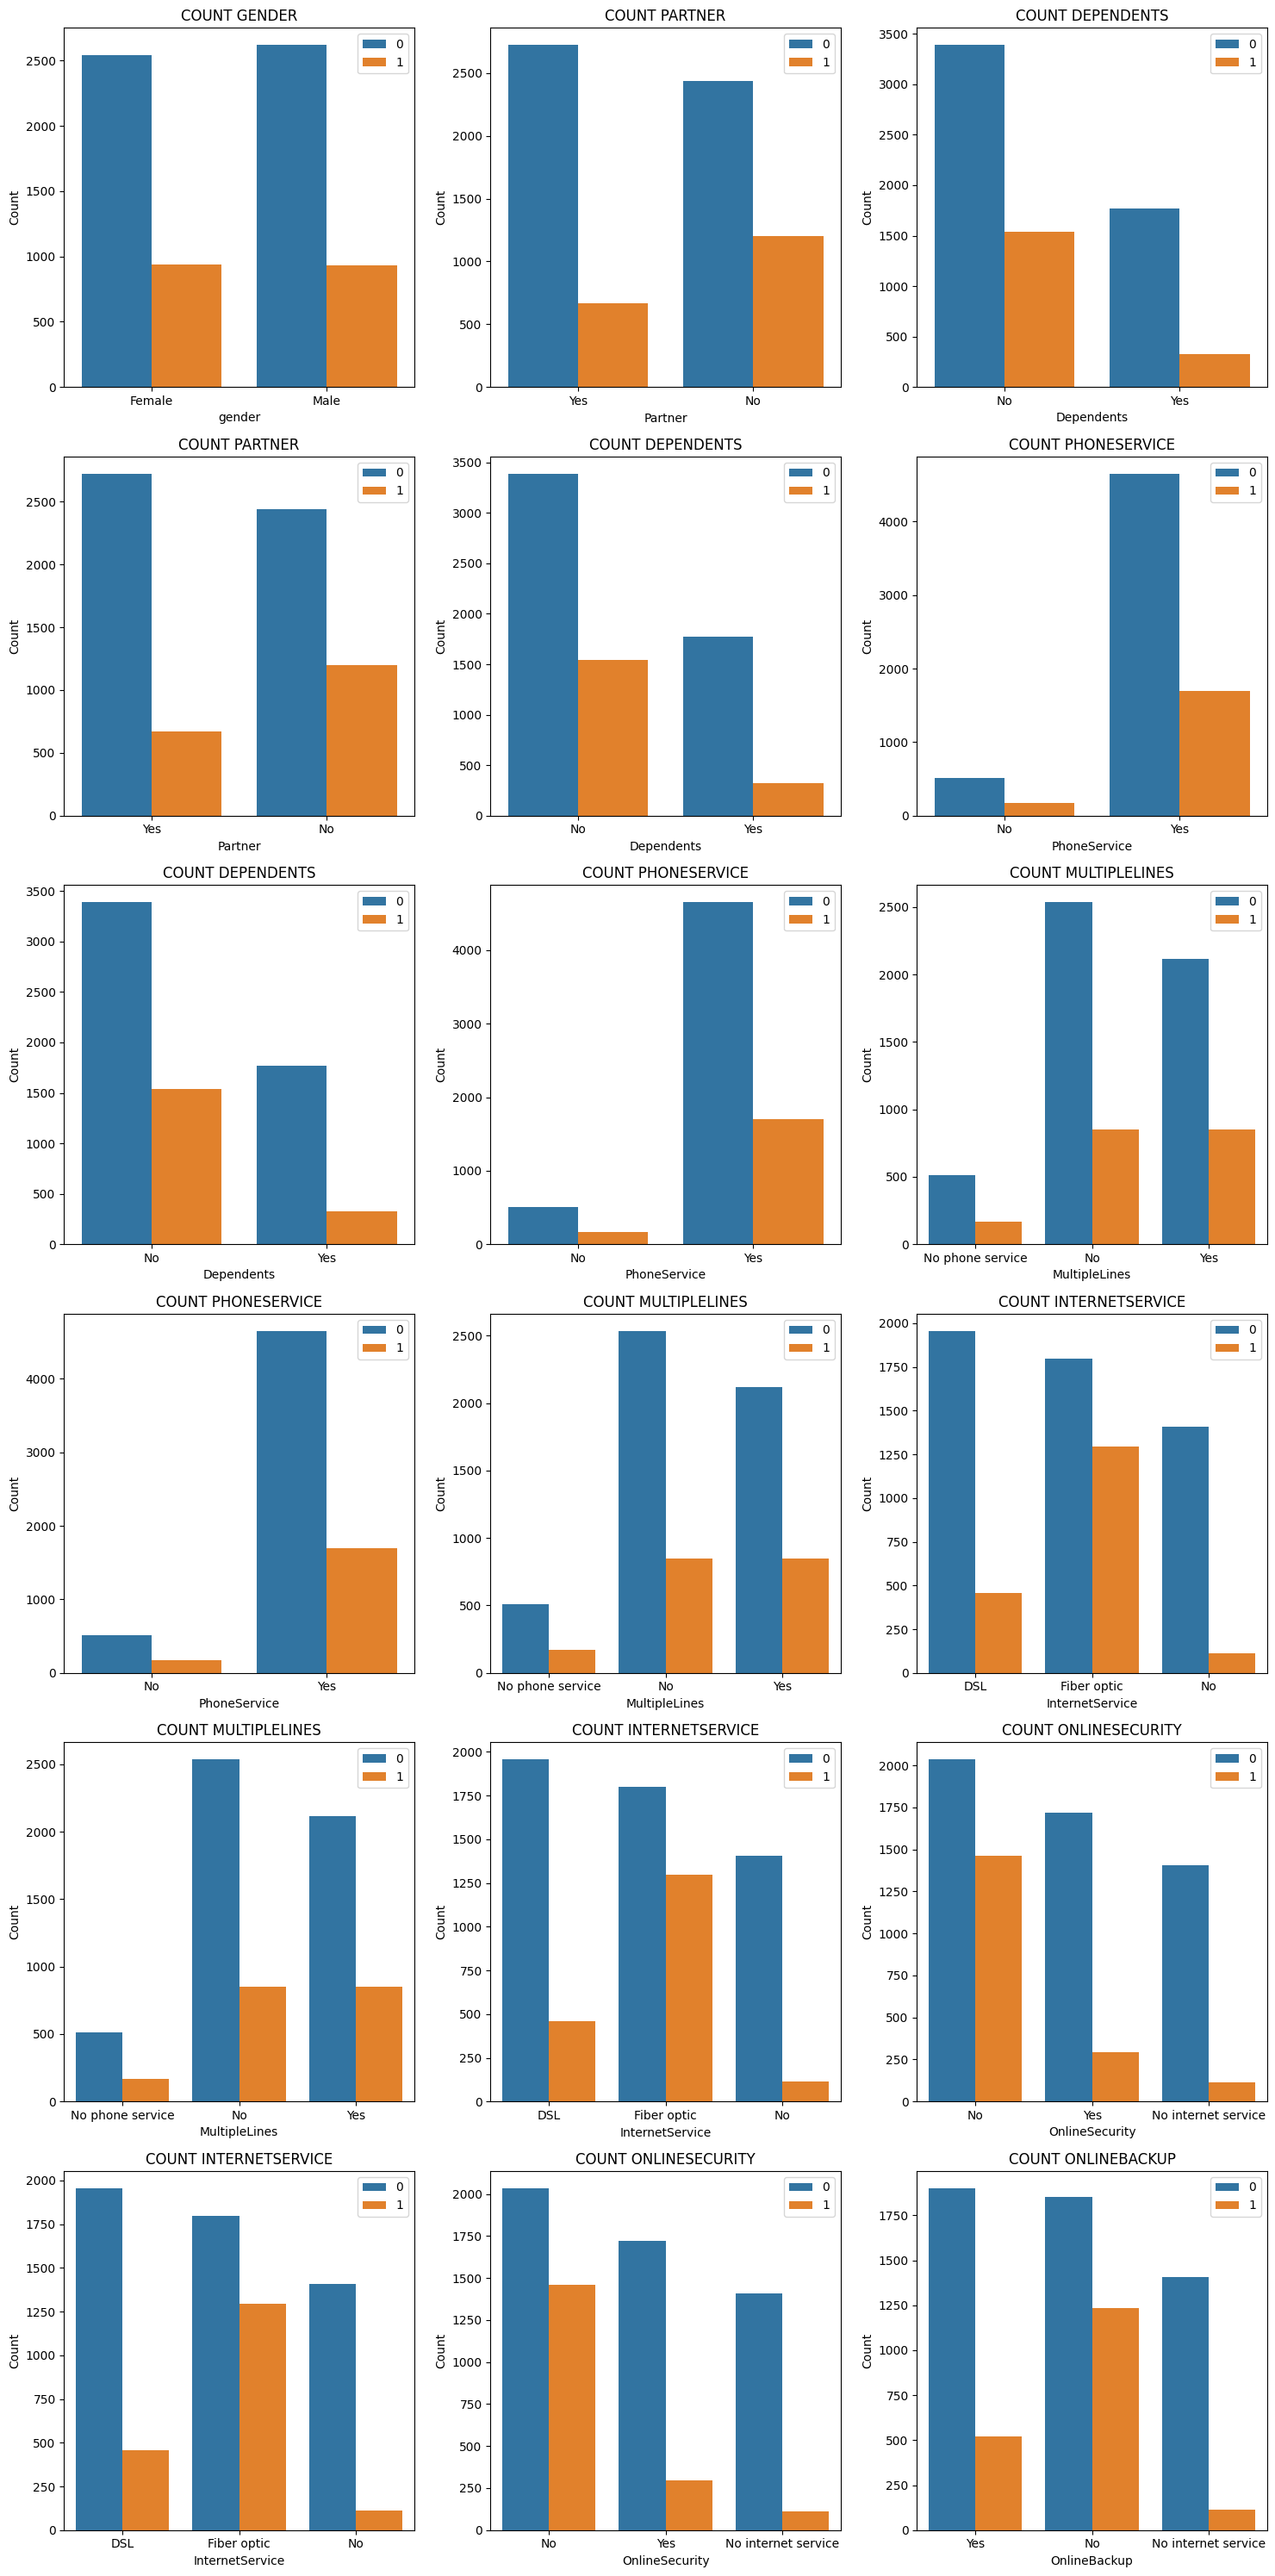

In [192]:
# Definiendo Función
def plot_categoricals(colums, ncols = 2):
    # Numero de graficas a realizar
    nplot = len(colums)
    nrows = ( nplot // ncols ) + 1
    fig, axes = plt.subplots(nrows,ncols, figsize=(15,30), constrained_layout=True)
    for row in range(nrows):
        for col in range(ncols):
            title = colums[row+col]
            sns.countplot(data=df, x=title, hue='Churn', ax =axes[row,col])
            axes[row,col].set_title('COUNT ' + title.upper())
            axes[row,col].set_xlabel(title)
            axes[row,col].set_ylabel('Count')
            axes[row,col].legend()
    fig.tight_layout()
    plt.show()

# Graficando con la Función
plot_categoricals(colum_cat, 3)

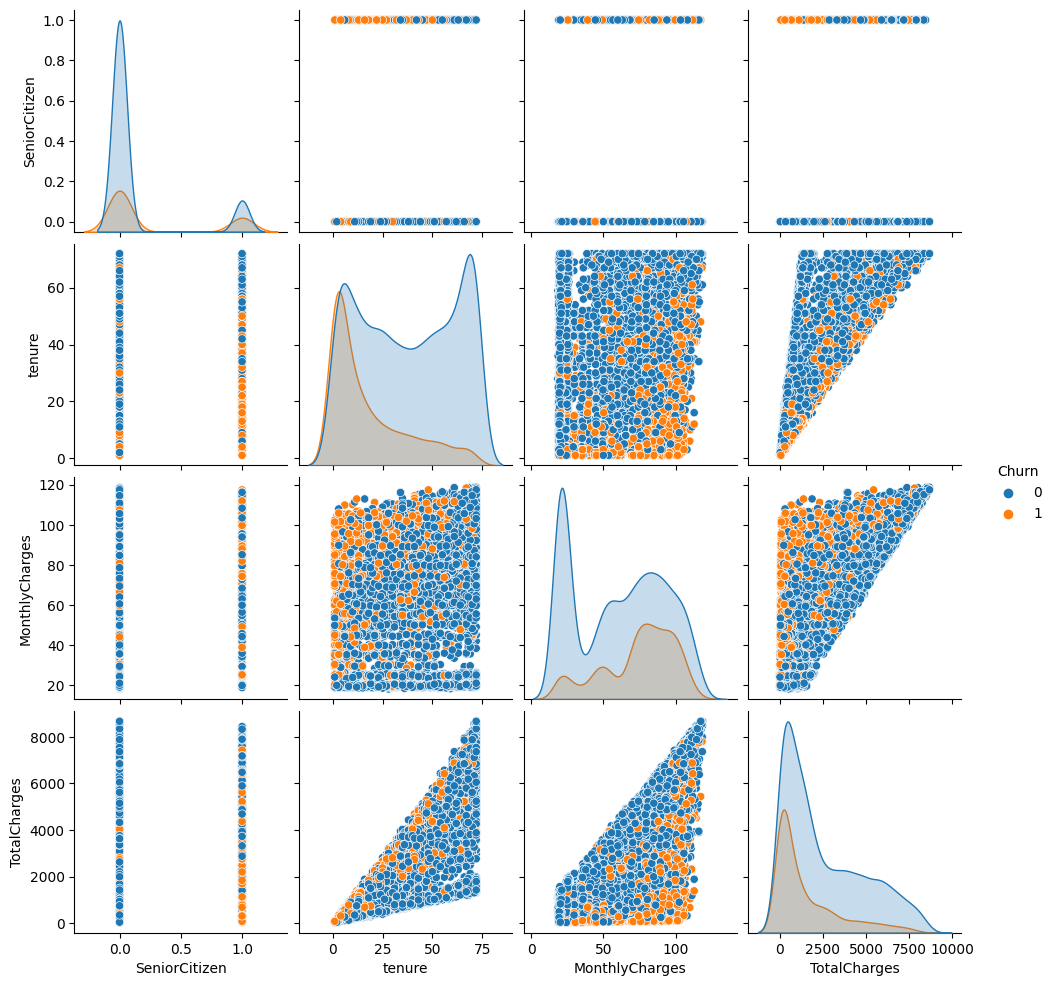

In [193]:
sns.pairplot(data=df, hue='Churn');

## Entrenamiento del modelo de regresión logística binomial

In [194]:
X = df_processing_scaled.drop('Churn', axis=1)
y = df_processing_scaled['Churn'].values

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)

In [196]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

/Users/andressanchez/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [197]:
from sklearn import metrics
prediction_test = model.predict(X_test) 
print (metrics.accuracy_score(y_test, prediction_test))


0.795734597156398


## Evaluación del modelo

In [198]:
model.predict_proba(X_test)

array([[0.99021183, 0.00978817],
       [0.86177511, 0.13822489],
       [0.30193071, 0.69806929],
       ...,
       [0.99028272, 0.00971728],
       [0.70132412, 0.29867588],
       [0.8286526 , 0.1713474 ]])

In [199]:
model.coef_

array([[ 2.16455763e-01, -3.10072227e+00, -1.62260486e-01,
         1.19637145e+00,  9.33954534e-04, -2.24830670e-02,
        -7.15001712e-02,  4.99510588e-02,  1.16803878e-01,
        -1.38352991e-01,  8.51114164e-02, -1.06660529e-01,
        -1.58856415e-01,  8.51114164e-02,  5.21958861e-02,
        -4.17811410e-01,  5.11402455e-01, -1.15140157e-01,
         2.40088586e-01, -1.15140157e-01, -1.46497541e-01,
         8.40744700e-02, -1.15140157e-01,  9.51657506e-03,
         5.65171881e-02, -1.15140157e-01,  3.70738570e-02,
         2.20213883e-01, -1.15140157e-01, -1.26622838e-01,
        -8.59224895e-02, -1.15140157e-01,  1.79513535e-01,
        -8.76648200e-02, -1.15140157e-01,  1.81255865e-01,
         7.42704039e-01, -9.75399724e-02, -6.66713179e-01,
        -1.13994673e-01,  9.24455610e-02, -2.72797552e-03,
        -1.58701362e-01,  2.16922747e-01, -7.70425223e-02]])

In [200]:
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two y

AxesSubplot(0.125,0.11;0.775x0.77)


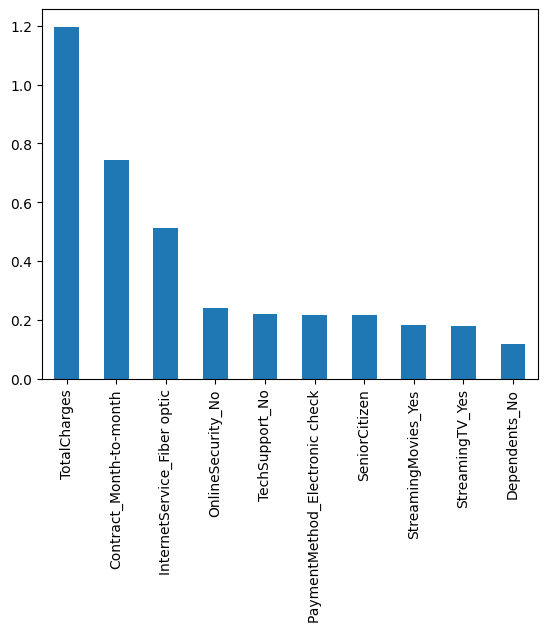

In [204]:
weights = pd.Series(model.coef_[0], index=X.columns.values)
print(weights.sort_values(ascending = False)[:10].plot(kind='bar')); # Top 10 Features 

AxesSubplot(0.125,0.11;0.775x0.77)


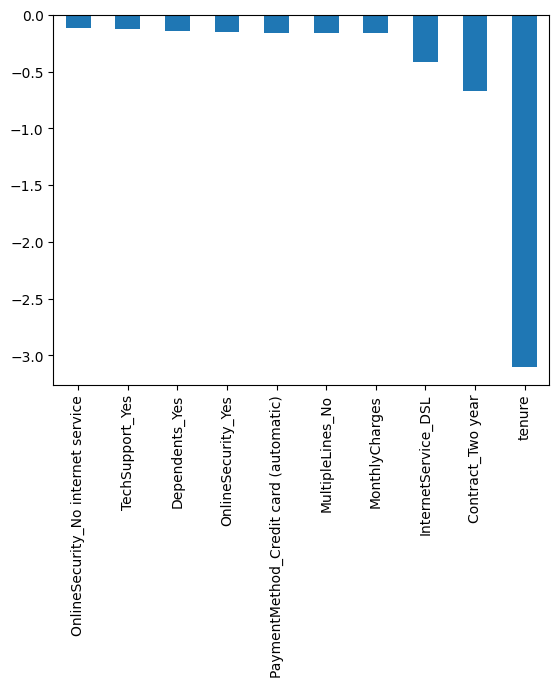

In [205]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar')); # Top 10 Features  Negatives

In [206]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

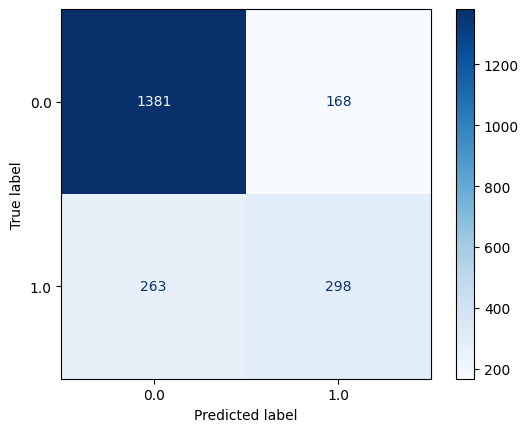

In [207]:
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_) 
disp.plot(cmap='Blues');